In [1]:
#imports
import pandas as pd
import numpy as np

#csv -> dataframe
species_df = pd.read_csv('species.csv', dtype = str)
parks_df = pd.read_csv('parks.csv')

species_df.head()
#Note: not sure why there is a 14th data column showing-there are only 13 columns of data-this is confirmed
#in the documentation for the dataset. Will come back and drop that.

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [25]:
parks_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


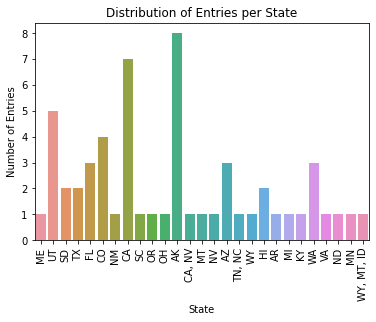

In [28]:
p = sns.countplot(x="State", data=parks_df)
p.set_title("Distribution of Entries per State")
p.set(xlabel = "State", ylabel = "Number of Entries")
plt.xticks(rotation=90)
plt.show()

In [2]:
#drop that extra column in species_df
species_df = species_df.iloc[: , :-1]
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN


In [3]:
#sort entries into animals, plants (+ fungi)

plant_animal_boolean_list = []
for entry in species_df['Category']:
    if entry == 'Vascular Plant' or  entry =='Fungi' or entry =='Nonvascular Plant' or entry =='Algae':
        plant_animal = 0
        plant_animal_boolean_list.append(plant_animal)
    else:
        plant_animal = 1
        plant_animal_boolean_list.append(plant_animal)

species_df['plant_animal'] = plant_animal_boolean_list

In [4]:
#check for new column
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,plant_animal
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,1
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,1
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,1
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,0
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,0
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,0
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,0


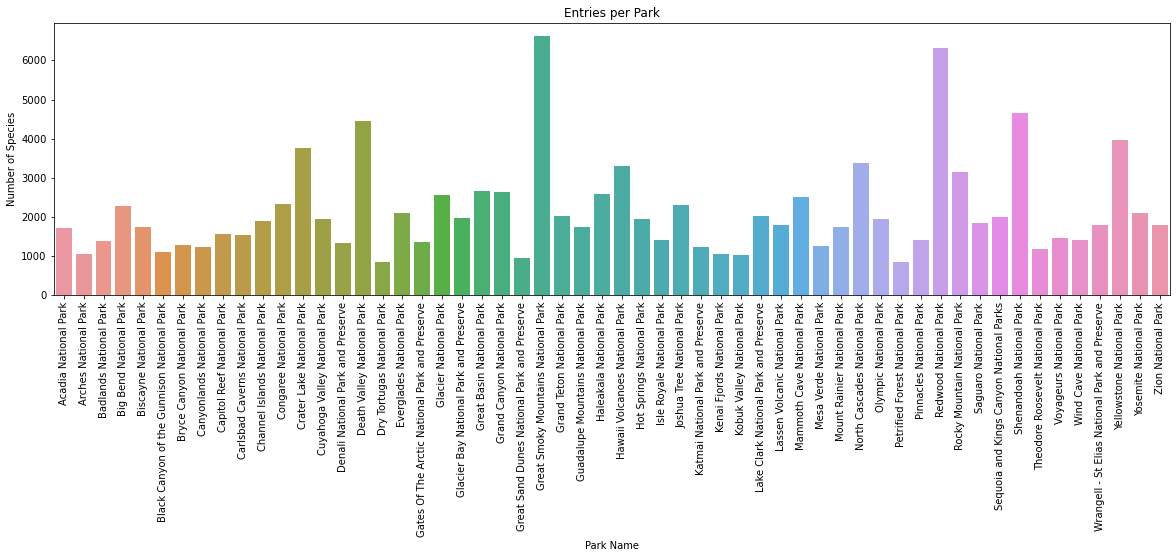

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

p = sns.countplot(x="Park Name", data=species_df)
p.set_title("Entries per Park")
p.set(xlabel = "Park Name", ylabel = "Number of Species")
plt.xticks(rotation=90)
plt.show()

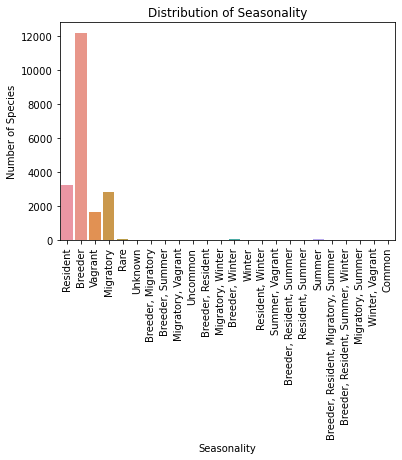

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.countplot(x="Seasonality", data=species_df)
p.set_title("Distribution of Seasonality")
p.set(xlabel = "Seasonality", ylabel = "Number of Species")
plt.xticks(rotation=90)
plt.show()

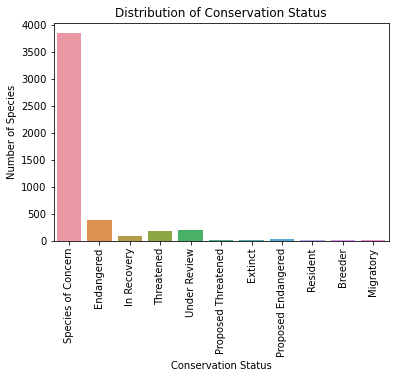

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.countplot(x="Conservation Status", data=species_df)
p.set_title("Distribution of Conservation Status")
p.set(xlabel = "Conservation Status", ylabel = "Number of Species")
plt.xticks(rotation=90)
plt.show()

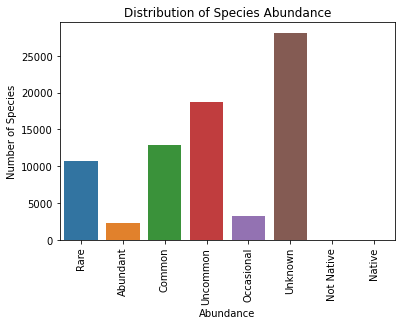

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.countplot(x="Abundance", data=species_df)
p.set_title("Distribution of Species Abundance")
p.set(xlabel = "Abundance", ylabel = "Number of Species")
plt.xticks(rotation=90)
plt.show()

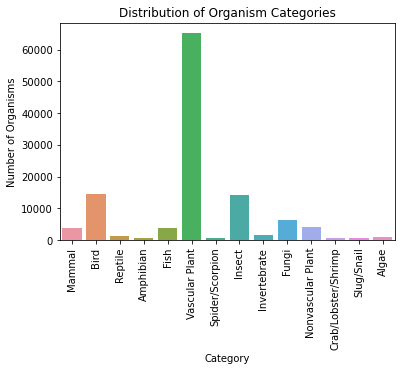

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.countplot(x="Category", data=species_df)
p.set_title("Distribution of Organism Categories")
p.set(xlabel = "Category", ylabel = "Number of Organisms")
plt.xticks(rotation=90)
plt.show()

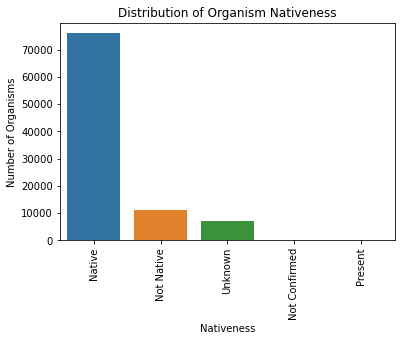

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.countplot(x="Nativeness", data=species_df)
p.set_title("Distribution of Organism Nativeness")
p.set(xlabel = "Nativeness", ylabel = "Number of Organisms")
plt.xticks(rotation=90)
plt.show()

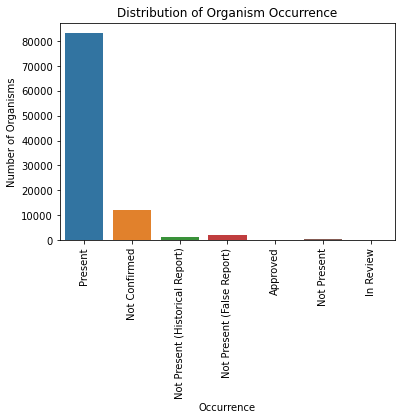

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.countplot(x="Occurrence", data=species_df)
p.set_title("Distribution of Organism Occurrence")
p.set(xlabel = "Occurrence", ylabel = "Number of Organisms")
plt.xticks(rotation=90)
plt.show()

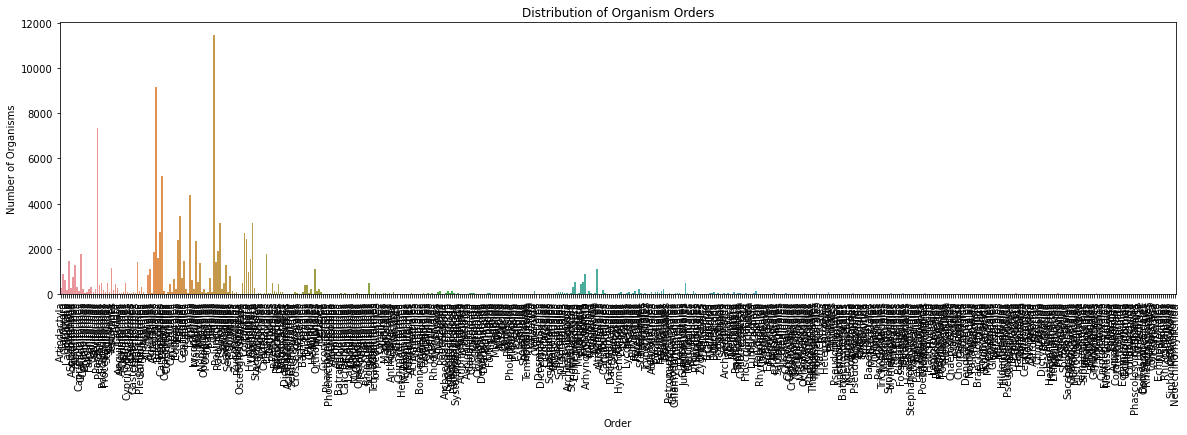

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

p = sns.countplot(x="Order", data=species_df)
p.set_title("Distribution of Organism Orders")
p.set(xlabel = "Order", ylabel = "Number of Organisms")
plt.xticks(rotation=90)
plt.show()

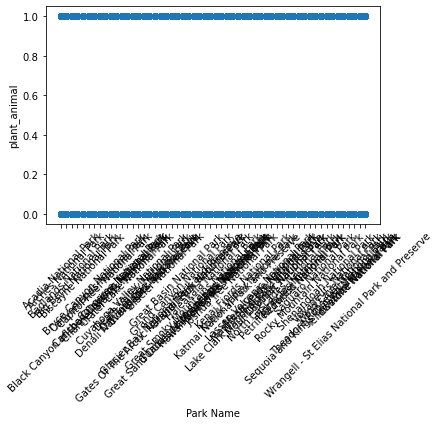

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
ax.scatter(x=species_df["Park Name"], y=species_df["plant_animal"])
plt.xlabel("Park Name")
plt.ylabel("plant_animal")
plt.xticks(rotation=45)

plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

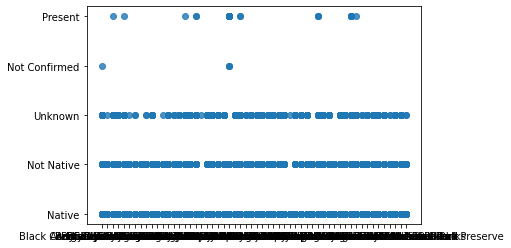

In [5]:
import seaborn as sns

sns.regplot(x=species_df["Park Name"], y=species_df["Nativeness"])

In [ ]:
#entries where "Record Status" is a Common Name clearly have errors
#entries with "In Review" record status are missing data in some fields,
#may not be as reliable as "Approved" entries
#BUT they make up a substantial portion of the dataset - let's try keeping them in

species_df = species_df[species_df['Record Status'].isin(["Approved", "In Review"])]
species_df

In [ ]:
#this data is primarily text
#so we will need to do some label encoding before we can create and train data models

#label encode Park Name
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

def LabelEncode (df):
    for col in df:
        df[col] = class_labels.fit_transform(df[col].values)

In [ ]:
#label encode species dataframe
LabelEncode(species_df)
species_df

In [ ]:
#scientific names should be unique - each entry already has unique identifier in "Species ID"
#common names are useful for humans but may just muddy the waters for machine learning/modeling

species_df_filtered = species_df.drop(labels = ["Scientific Name", "Common Names"], axis = 1)

species_df_filtered.head()

In [ ]:
#check data types - see if our label encoding behaved
species_df_filtered.info()

In [ ]:
#modeling to predict "Plant or Animal"
#import train_test_split
from sklearn.model_selection import train_test_split

X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#set up Logistic Regression model
from sklearn.linear_model import LogisticRegression

regression_pa = LogisticRegression()
regression_pa.fit(X_train, y_train)

In [ ]:
#check performance of regression model
regression_pa.fit(X_train, y_train)
y_pred = regression_pa.predict(X_test)
regression_pa.score(X_test, y_test)

In [ ]:
#import MSE - check RMSE
from sklearn.metrics import mean_squared_error as MSE

rmse_log_pa = MSE(y_test, y_pred) ** (1/2)
print(rmse_log_pa)

In [ ]:
print(y_test)

In [ ]:
print(y_pred)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Predicted Animal/Plant vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

ax.xaxis.set_ticklabels(['Plants', 'Animals'])
ax.yaxis.set_ticklabels(['Plants', 'Animals'])

plt.show()

In [ ]:
#pretty good results!  let's try other modeling methods

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
dt_pa = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pa.fit(X_train, y_train)

In [ ]:
y_pred = dt_pa.predict(X_test)

dt_pa_score = accuracy_score(y_test, y_pred)
print(dt_pa_score)

In [ ]:
cm_dt_pa = confusion_matrix(y_test, y_pred)
cm_dt_pa

In [ ]:
ax = sns.heatmap(cm_dt_pa, annot=True, fmt='g')
ax.set_title('Predicted Animal/Plant vs. Actual')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

ax.xaxis.set_ticklabels(['Plants', 'Animals'])
ax.yaxis.set_ticklabels(['Plants', 'Animals'])

plt.show()

In [ ]:
#check rmse
rmse_dt_pa = MSE(y_test, y_pred) ** (1/2)
print(rmse_dt_pa)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#set seed
SEED = 42

X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = SEED)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
rf_pa = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.1, random_state = SEED)
rf_pa.fit(X_train, y_train)

In [ ]:
y_pred = rf_pa.predict(X_test)

rmse_rf_pa = MSE(y_test, y_pred) ** (1/2)
print(rmse_rf_pa)

In [ ]:
#neural network imports
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X = species_df_filtered.drop('plant_animal', axis=1)
y = species_df_filtered['plant_animal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#scale dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

number_features = X_train.shape[1]

In [ ]:
#defining the model
model_pa = Sequential()
model_pa.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(number_features,)))
model_pa.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model_pa.add(Dense(2, activation='softmax'))

In [ ]:
#compile model
model_pa.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#run Abundance neural network model
model_pa.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2)

Can't get much better performance than this!  Makes sense, as binary classification is the simplest kind of classification problem, and should be the easiest for our model algorithms to figure out.